Maternal, Neonatal, and Nutrition

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#create a dataframe from each excel sheet.

filepath = "Data Files/Cleaned Files/Copy of mort_cleaned.xlsx"

xls = pd.ExcelFile(filepath)

df_Maternal_disorders = pd.read_excel(xls,'Maternal disorders')
df_Neonatal_disorders = pd.read_excel(xls,'Neonatal disorders')
df_Nutritional_deficiencies = pd.read_excel(xls, 'Nutritional deficiencies')

In [3]:
filepath2 = "Data Files/Cleaned Files/NIH Data Alcohol Consumption.csv"
filepath3 = "Data Files/Cleaned Files/NIH Data FIPS.csv"
filepath4 = "Data Files/Cleaned Files/NIH Beverage Codes.csv"

df_nih = pd.read_csv(filepath2)
df_beverage_codes = pd.read_csv(filepath4)
df_fips_codes = pd.read_csv(filepath3)

In [4]:
df_nih.head()

,Year,FIPS,Type of beverage,Gallons of beverage,Gallons of ethanol,Population (14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV
0,1970,1,1,3863000,1738350,2499000,6956,9.0,2020000,8606,9.0,.,.,.
1,1970,1,2,1412000,225920,2499000,904,9.0,2020000,1118,9.0,.,.,.
2,1970,1,3,33098000,1489410,2499000,5960,10.0,2020000,7373,10.0,.,.,.
3,1970,1,4,.,3453680,2499000,13820,10.0,2020000,17097,10.0,.,.,.
4,1970,2,1,945000,425250,205000,20744,1.0,165000,25773,1.0,.,.,.


In [5]:
df_nih_merged = pd.merge(df_nih, df_beverage_codes, how="left", left_on = 'Type of beverage', right_on = 'Beverage ID')
df_nih_merged = pd.merge(df_nih_merged, df_fips_codes, how="left", left_on = 'FIPS', right_on = 'FIPS')
df_nih_merged.head()

,Year,FIPS,Type of beverage,Gallons of beverage,Gallons of ethanol,Population (14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,Beverage ID,Beverage Type,State
0,1970,1,1,3863000,1738350,2499000,6956,9.0,2020000,8606,9.0,.,.,.,1,Spirits,Alabama
1,1970,1,2,1412000,225920,2499000,904,9.0,2020000,1118,9.0,.,.,.,2,Wine,Alabama
2,1970,1,3,33098000,1489410,2499000,5960,10.0,2020000,7373,10.0,.,.,.,3,Beer,Alabama
3,1970,1,4,.,3453680,2499000,13820,10.0,2020000,17097,10.0,.,.,.,4,All Beverages,Alabama
4,1970,2,1,945000,425250,205000,20744,1.0,165000,25773,1.0,.,.,.,1,Spirits,Alaska


In [6]:
# Create subsets for year

nih_1980 = df_nih_merged.loc[(df_nih_merged['Year'] == 1980) & (df_nih_merged['FIPS'] < 60)]
nih_1985 = df_nih_merged.loc[(df_nih_merged['Year'] == 1985) & (df_nih_merged['FIPS'] < 60)]
nih_1990 = df_nih_merged.loc[(df_nih_merged['Year'] == 1990) & (df_nih_merged['FIPS'] < 60)]
nih_1995 = df_nih_merged.loc[(df_nih_merged['Year'] == 1995) & (df_nih_merged['FIPS'] < 60)]
nih_2000 = df_nih_merged.loc[(df_nih_merged['Year'] == 2000) & (df_nih_merged['FIPS'] < 60)]
nih_2005 = df_nih_merged.loc[(df_nih_merged['Year'] == 2005) & (df_nih_merged['FIPS'] < 60)]
nih_2010 = df_nih_merged.loc[(df_nih_merged['Year'] == 2010) & (df_nih_merged['FIPS'] < 60)]
nih_2014 = df_nih_merged.loc[(df_nih_merged['Year'] == 2014) & (df_nih_merged['FIPS'] < 60)]

In [7]:
# Get States Data from Maternal Disorders DataFrame
df_maternal_disorders = df_Maternal_disorders.loc[df_Maternal_disorders['FIPS'] < 60]

df_maternal_disorders.head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
1,Alabama,1.0,"0.30 (0.27, 0.33)","0.27 (0.25, 0.30)","0.31 (0.28, 0.34)","0.29 (0.26, 0.32)","0.28 (0.26, 0.31)","0.39 (0.36, 0.43)","0.42 (0.38, 0.46)","0.40 (0.36, 0.45)","35.03 (16.75, 57.34)"
69,Alaska,2.0,"0.12 (0.08, 0.18)","0.11 (0.08, 0.15)","0.15 (0.11, 0.20)","0.16 (0.12, 0.21)","0.15 (0.11, 0.19)","0.20 (0.15, 0.25)","0.20 (0.14, 0.26)","0.19 (0.13, 0.26)","55.91 (-11.99, 170.86)"
99,Arizona,4.0,"0.19 (0.16, 0.22)","0.16 (0.14, 0.18)","0.20 (0.18, 0.23)","0.21 (0.18, 0.23)","0.19 (0.17, 0.21)","0.26 (0.23, 0.29)","0.25 (0.23, 0.28)","0.23 (0.21, 0.26)","23.09 (0.23, 52.64)"
115,Arkansas,5.0,"0.25 (0.23, 0.27)","0.24 (0.22, 0.27)","0.32 (0.29, 0.35)","0.34 (0.31, 0.38)","0.33 (0.30, 0.36)","0.47 (0.43, 0.52)","0.49 (0.45, 0.54)","0.50 (0.45, 0.55)","101.91 (72.63, 134.02)"
191,California,6.0,"0.20 (0.18, 0.22)","0.18 (0.17, 0.19)","0.21 (0.20, 0.22)","0.20 (0.19, 0.22)","0.20 (0.18, 0.21)","0.26 (0.24, 0.27)","0.26 (0.24, 0.27)","0.24 (0.22, 0.25)","18.37 (5.61, 33.45)"


In [8]:
# Create new dataframe for 1980 substance abuse
nih_1980_merged_maternal = pd.merge(nih_1980, df_maternal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )


In [9]:
# Grab only needed columns
nih_1980_merged_maternal = nih_1980_merged_maternal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1980*','Location']]
nih_1980_merged_maternal.head()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,"Mortality Rate, 1980*",Location
0,1980,1,1,8959,"0.30 (0.27, 0.33)",Alabama
1,1980,1,2,1960,"0.30 (0.27, 0.33)",Alabama
2,1980,1,3,11504,"0.30 (0.27, 0.33)",Alabama
3,1980,1,4,22423,"0.30 (0.27, 0.33)",Alabama
4,1980,2,1,20345,"0.12 (0.08, 0.18)",Alaska


In [10]:
# Do the other years for Maternal Disorders and grab only needed columns
nih_1985_merged_maternal = pd.merge(nih_1985, df_maternal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1985_merged_maternal = nih_1985_merged_maternal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1985*','Location']]

nih_1990_merged_maternal = pd.merge(nih_1990, df_maternal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1990_merged_maternal = nih_1990_merged_maternal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1990*','Location']]

nih_1995_merged_maternal = pd.merge(nih_1995, df_maternal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1995_merged_maternal = nih_1995_merged_maternal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1995*','Location']]

nih_2000_merged_maternal = pd.merge(nih_2000, df_maternal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2000_merged_maternal = nih_2000_merged_maternal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2000*','Location']]

nih_2005_merged_maternal = pd.merge(nih_2005, df_maternal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2005_merged_maternal = nih_2005_merged_maternal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2005*','Location']]

nih_2010_merged_maternal = pd.merge(nih_2010, df_maternal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2010_merged_maternal = nih_2010_merged_maternal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2010*','Location']]

nih_2014_merged_maternal = pd.merge(nih_2014, df_maternal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2014_merged_maternal = nih_2014_merged_maternal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2014*','Location']]

nih_2014_merged_maternal.head()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,"Mortality Rate, 2014*",Location
0,2014,1,1,6945,"0.40 (0.36, 0.45)",Alabama
1,2014,1,2,2861,"0.40 (0.36, 0.45)",Alabama
2,2014,1,3,12693,"0.40 (0.36, 0.45)",Alabama
3,2014,1,4,22499,"0.40 (0.36, 0.45)",Alabama
4,2014,2,1,13197,"0.19 (0.13, 0.26)",Alaska


In [11]:
# Create dataframe for the Neonatal

df_neonatal_disorders = df_Neonatal_disorders.loc[df_Neonatal_disorders['FIPS'] < 60]

df_neonatal_disorders.head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
1,Alabama,1.0,"11.03 (10.57, 12.00)","8.51 (8.25, 9.12)","7.52 (7.28, 7.95)","6.08 (5.89, 6.29)","6.21 (5.92, 6.40)","6.32 (5.96, 6.52)","5.58 (5.16, 5.78)","5.10 (4.67, 5.32)","-53.82 (-60.08, -50.77)"
69,Alaska,2.0,"8.19 (7.63, 8.98)","5.79 (5.43, 6.27)","4.83 (4.54, 5.20)","3.59 (3.37, 3.83)","3.37 (3.11, 3.57)","3.32 (3.03, 3.54)","2.69 (2.38, 2.89)","2.35 (2.05, 2.56)","-71.35 (-76.40, -68.20)"
99,Arizona,4.0,"8.53 (8.14, 9.24)","6.04 (5.81, 6.49)","5.32 (5.13, 5.63)","4.06 (3.92, 4.21)","4.01 (3.80, 4.15)","4.04 (3.77, 4.17)","3.19 (2.88, 3.31)","2.71 (2.42, 2.85)","-68.17 (-73.26, -65.69)"
115,Arkansas,5.0,"8.60 (8.18, 9.42)","6.65 (6.44, 7.19)","5.89 (5.68, 6.29)","4.69 (4.53, 4.87)","4.76 (4.51, 4.93)","4.91 (4.59, 5.08)","4.23 (3.84, 4.38)","3.88 (3.50, 4.06)","-54.90 (-61.98, -51.44)"
191,California,6.0,"7.44 (7.13, 8.10)","5.67 (5.52, 6.09)","5.04 (4.90, 5.35)","3.78 (3.68, 3.90)","3.37 (3.19, 3.46)","3.30 (3.08, 3.39)","2.66 (2.40, 2.75)","2.27 (2.03, 2.38)","-69.50 (-74.39, -67.19)"


In [12]:
# Do the years for Neonatal Disorders and grab only needed columns

nih_1980_merged_neonatal = pd.merge(nih_1980, df_neonatal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1980_merged_neonatal = nih_1980_merged_neonatal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1980*','Location']]

nih_1985_merged_neonatal = pd.merge(nih_1985, df_neonatal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1985_merged_neonatal = nih_1985_merged_neonatal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1985*','Location']]

nih_1990_merged_neonatal = pd.merge(nih_1990, df_neonatal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1990_merged_neonatal = nih_1990_merged_neonatal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1990*','Location']]

nih_1995_merged_neonatal = pd.merge(nih_1995, df_neonatal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1995_merged_neonatal = nih_1995_merged_neonatal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1995*','Location']]

nih_2000_merged_neonatal = pd.merge(nih_2000, df_neonatal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2000_merged_neonatal = nih_2000_merged_neonatal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2000*','Location']]

nih_2005_merged_neonatal = pd.merge(nih_2005, df_neonatal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2005_merged_neonatal = nih_2005_merged_neonatal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2005*','Location']]

nih_2010_merged_neonatal = pd.merge(nih_2010, df_neonatal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2010_merged_neonatal = nih_2010_merged_neonatal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2010*','Location']]

nih_2014_merged_neonatal = pd.merge(nih_2014, df_neonatal_disorders, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2014_merged_neonatal = nih_2014_merged_neonatal[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2014*','Location']]

nih_2014_merged_neonatal.head()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,"Mortality Rate, 2014*",Location
0,2014,1,1,6945,"5.10 (4.67, 5.32)",Alabama
1,2014,1,2,2861,"5.10 (4.67, 5.32)",Alabama
2,2014,1,3,12693,"5.10 (4.67, 5.32)",Alabama
3,2014,1,4,22499,"5.10 (4.67, 5.32)",Alabama
4,2014,2,1,13197,"2.35 (2.05, 2.56)",Alaska


In [13]:
# Create dataframe for the Nutrition

df_nutrition_deficiency = df_Nutritional_deficiencies.loc[df_Neonatal_disorders['FIPS'] < 60]

df_nutrition_deficiency.head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
1,Alabama,1.0,"2.06 (1.86, 2.27)","2.10 (1.95, 2.27)","2.17 (2.02, 2.33)","2.45 (2.27, 2.64)","2.59 (2.40, 2.79)","2.13 (1.98, 2.29)","1.93 (1.77, 2.08)","1.99 (1.80, 2.19)","-3.48 (-16.00, 11.77)"
69,Alaska,2.0,"2.43 (1.50, 3.56)","2.25 (1.52, 3.14)","2.18 (1.61, 2.86)","2.28 (1.80, 2.85)","2.33 (1.91, 2.86)","1.82 (1.47, 2.23)","1.60 (1.24, 2.02)","1.64 (1.21, 2.18)","-32.43 (-61.82, 26.68)"
99,Arizona,4.0,"2.02 (1.79, 2.28)","1.87 (1.67, 2.07)","1.66 (1.50, 1.82)","1.86 (1.67, 2.05)","1.52 (1.39, 1.68)","1.06 (0.96, 1.16)","0.95 (0.85, 1.06)","0.94 (0.84, 1.05)","-53.46 (-61.03, -44.32)"
115,Arkansas,5.0,"1.73 (1.56, 1.93)","1.88 (1.73, 2.05)","2.02 (1.87, 2.19)","2.38 (2.20, 2.57)","2.60 (2.40, 2.82)","2.22 (2.05, 2.40)","2.12 (1.93, 2.32)","2.27 (2.04, 2.51)","30.86 (12.80, 53.32)"
191,California,6.0,"1.09 (0.98, 1.19)","1.03 (0.96, 1.10)","0.98 (0.91, 1.06)","1.01 (0.94, 1.08)","1.01 (0.93, 1.08)","0.79 (0.74, 0.85)","0.66 (0.61, 0.72)","0.66 (0.60, 0.72)","-39.68 (-46.90, -31.30)"


In [14]:
# Do the years for Nutritional Deficiencies and grab only needed columns

nih_1980_merged_nutrition = pd.merge(nih_1980, df_nutrition_deficiency, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1980_merged_nutrition = nih_1980_merged_nutrition[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1980*','Location']]

nih_1985_merged_nutrition = pd.merge(nih_1985, df_nutrition_deficiency, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1985_merged_nutrition = nih_1985_merged_nutrition[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1985*','Location']]

nih_1990_merged_nutrition = pd.merge(nih_1990, df_nutrition_deficiency, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1990_merged_nutrition = nih_1990_merged_nutrition[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1990*','Location']]

nih_1995_merged_nutrition = pd.merge(nih_1995, df_nutrition_deficiency, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1995_merged_nutrition = nih_1995_merged_nutrition[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1995*','Location']]

nih_2000_merged_nutrition = pd.merge(nih_2000, df_nutrition_deficiency, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2000_merged_nutrition = nih_2000_merged_nutrition[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2000*','Location']]

nih_2005_merged_nutrition = pd.merge(nih_2005, df_nutrition_deficiency, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2005_merged_nutrition = nih_2005_merged_nutrition[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2005*','Location']]

nih_2010_merged_nutrition = pd.merge(nih_2010, df_nutrition_deficiency, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2010_merged_nutrition = nih_2010_merged_nutrition[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2010*','Location']]

nih_2014_merged_nutrition = pd.merge(nih_2014, df_nutrition_deficiency, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2014_merged_nutrition = nih_2014_merged_nutrition[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2014*','Location']]

nih_2014_merged_nutrition.head()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,"Mortality Rate, 2014*",Location
0,2014,1,1,6945,"1.99 (1.80, 2.19)",Alabama
1,2014,1,2,2861,"1.99 (1.80, 2.19)",Alabama
2,2014,1,3,12693,"1.99 (1.80, 2.19)",Alabama
3,2014,1,4,22499,"1.99 (1.80, 2.19)",Alabama
4,2014,2,1,13197,"1.64 (1.21, 2.18)",Alaska


In [15]:
# Rename Mortality Rate column for Maternal

nih_1980_merged_maternal.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_maternal.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_maternal.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_maternal.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_maternal.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_maternal.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_maternal.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_maternal.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [16]:
# Create concat of Maternal data for the years

df_maternal_years = [nih_1980_merged_maternal, 
                    nih_1985_merged_maternal,
                    nih_1990_merged_maternal,
                    nih_1995_merged_maternal,
                    nih_2000_merged_maternal,
                    nih_2005_merged_maternal,
                    nih_2010_merged_maternal,
                    nih_2014_merged_maternal]

df_concat_maternal = pd.concat(df_maternal_years)

df_concat_maternal

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location
0,1980,1,1,8959,"0.30 (0.27, 0.33)",Alabama
1,1980,1,2,1960,"0.30 (0.27, 0.33)",Alabama
2,1980,1,3,11504,"0.30 (0.27, 0.33)",Alabama
3,1980,1,4,22423,"0.30 (0.27, 0.33)",Alabama
4,1980,2,1,20345,"0.12 (0.08, 0.18)",Alaska
...,...,...,...,...,...,...
199,2014,55,4,33634,"0.24 (0.22, 0.27)",Wisconsin
200,2014,56,1,13061,"0.34 (0.29, 0.39)",Wyoming
201,2014,56,2,3460,"0.34 (0.29, 0.39)",Wyoming
202,2014,56,3,14129,"0.34 (0.29, 0.39)",Wyoming


In [17]:
# Rename Mortality Rate column for Neonatal

nih_1980_merged_neonatal.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_neonatal.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_neonatal.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_neonatal.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_neonatal.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_neonatal.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_neonatal.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_neonatal.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [18]:
# Create concat of Neonatal data for the years

df_neonatal_years = [nih_1980_merged_neonatal, 
                    nih_1985_merged_neonatal,
                    nih_1990_merged_neonatal,
                    nih_1995_merged_neonatal,
                    nih_2000_merged_neonatal,
                    nih_2005_merged_neonatal,
                    nih_2010_merged_neonatal,
                    nih_2014_merged_neonatal]

df_concat_neonatal = pd.concat(df_neonatal_years)

df_concat_neonatal

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location
0,1980,1,1,8959,"11.03 (10.57, 12.00)",Alabama
1,1980,1,2,1960,"11.03 (10.57, 12.00)",Alabama
2,1980,1,3,11504,"11.03 (10.57, 12.00)",Alabama
3,1980,1,4,22423,"11.03 (10.57, 12.00)",Alabama
4,1980,2,1,20345,"8.19 (7.63, 8.98)",Alaska
...,...,...,...,...,...,...
199,2014,55,4,33634,"2.90 (2.62, 3.03)",Wisconsin
200,2014,56,1,13061,"2.91 (2.63, 3.08)",Wyoming
201,2014,56,2,3460,"2.91 (2.63, 3.08)",Wyoming
202,2014,56,3,14129,"2.91 (2.63, 3.08)",Wyoming


In [19]:
# Rename Mortality Rate column for Nutrition

nih_1980_merged_nutrition.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_nutrition.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_nutrition.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_nutrition.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_nutrition.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_nutrition.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_nutrition.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_nutrition.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [20]:
# Create concat of Nutrition data for the years

df_nutrition_years = [nih_1980_merged_nutrition, 
                    nih_1985_merged_nutrition,
                    nih_1990_merged_nutrition,
                    nih_1995_merged_nutrition,
                    nih_2000_merged_nutrition,
                    nih_2005_merged_nutrition,
                    nih_2010_merged_nutrition,
                    nih_2014_merged_nutrition]

df_concat_nutrition = pd.concat(df_nutrition_years)

df_concat_nutrition

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location
0,1980,1,1,8959,"2.06 (1.86, 2.27)",Alabama
1,1980,1,2,1960,"2.06 (1.86, 2.27)",Alabama
2,1980,1,3,11504,"2.06 (1.86, 2.27)",Alabama
3,1980,1,4,22423,"2.06 (1.86, 2.27)",Alabama
4,1980,2,1,20345,"2.43 (1.50, 3.56)",Alaska
...,...,...,...,...,...,...
199,2014,55,4,33634,"1.12 (1.01, 1.24)",Wisconsin
200,2014,56,1,13061,"1.62 (1.38, 1.87)",Wyoming
201,2014,56,2,3460,"1.62 (1.38, 1.87)",Wyoming
202,2014,56,3,14129,"1.62 (1.38, 1.87)",Wyoming


In [21]:
# Rename Mortality Rate column

nih_1980_merged_maternal.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_maternal.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_maternal.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_maternal.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_maternal.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_maternal.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_maternal.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_maternal.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [22]:
# Concatenate all year dataframes

frames_maternal = [nih_1980_merged_maternal, 
                    nih_1985_merged_maternal,
                    nih_1990_merged_maternal,
                    nih_1995_merged_maternal,
                    nih_2000_merged_maternal,
                    nih_2005_merged_maternal,
                    nih_2010_merged_maternal,
                    nih_2014_merged_maternal]

df_concat_maternal = pd.concat(frames_maternal)

df_concat_maternal

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location
0,1980,1,1,8959,"0.30 (0.27, 0.33)",Alabama
1,1980,1,2,1960,"0.30 (0.27, 0.33)",Alabama
2,1980,1,3,11504,"0.30 (0.27, 0.33)",Alabama
3,1980,1,4,22423,"0.30 (0.27, 0.33)",Alabama
4,1980,2,1,20345,"0.12 (0.08, 0.18)",Alaska
...,...,...,...,...,...,...
199,2014,55,4,33634,"0.24 (0.22, 0.27)",Wisconsin
200,2014,56,1,13061,"0.34 (0.29, 0.39)",Wyoming
201,2014,56,2,3460,"0.34 (0.29, 0.39)",Wyoming
202,2014,56,3,14129,"0.34 (0.29, 0.39)",Wyoming


In [23]:
df_concat_maternal = pd.merge(df_concat_maternal,df_beverage_codes, how='left', left_on ='Type of beverage', right_on = 'Beverage ID')
df_concat_maternal_clean = df_concat_maternal['Mortality Rate'].str.split(' ').str.get(0).astype(float)
df_concat_maternal['Mortality Rate'] = df_concat_maternal_clean
df_concat_maternal

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
0,1980,1,1,8959,0.30,Alabama,1,Spirits
1,1980,1,2,1960,0.30,Alabama,2,Wine
2,1980,1,3,11504,0.30,Alabama,3,Beer
3,1980,1,4,22423,0.30,Alabama,4,All Beverages
4,1980,2,1,20345,0.12,Alaska,1,Spirits
...,...,...,...,...,...,...,...,...
1627,2014,55,4,33634,0.24,Wisconsin,4,All Beverages
1628,2014,56,1,13061,0.34,Wyoming,1,Spirits
1629,2014,56,2,3460,0.34,Wyoming,2,Wine
1630,2014,56,3,14129,0.34,Wyoming,3,Beer


In [24]:
# Isolate rows for all beverages

df_concat_maternal1 = df_concat_maternal.loc[df_concat_maternal['Beverage ID'] == 1]
df_concat_maternal2 = df_concat_maternal.loc[df_concat_maternal['Beverage ID'] == 2]
df_concat_maternal3 = df_concat_maternal.loc[df_concat_maternal['Beverage ID'] == 3]
df_concat_maternal4 = df_concat_maternal.loc[df_concat_maternal['Beverage ID'] == 4]
df_concat_maternal4.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,408.00000,408.000000,408.0,408.000000,392.000000,408.0
mean,1997.37500,28.960784,4.0,28492.458333,0.266531,4.0
std,11.28257,15.696083,0.0,7293.558657,0.094748,0.0
min,1980.00000,1.000000,4.0,14730.000000,0.100000,4.0
25%,1988.75000,16.000000,4.0,23933.750000,0.200000,4.0
50%,1997.50000,29.000000,4.0,26947.000000,0.250000,4.0
75%,2006.25000,42.000000,4.0,31153.250000,0.330000,4.0
max,2014.00000,56.000000,4.0,67723.000000,0.580000,4.0


In [25]:
# Remove nulls

df_concat_maternal1.dropna(inplace=True)
df_concat_maternal2.dropna(inplace=True)
df_concat_maternal3.dropna(inplace=True)
df_concat_maternal4.dropna(inplace=True)


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [26]:
df_concat_maternal4.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,392.000000,392.000000,392.0,392.000000,392.000000,392.0
mean,1997.375000,29.244898,4.0,27658.872449,0.266531,4.0
std,11.283135,15.793463,0.0,5992.708880,0.094748,0.0
min,1980.000000,1.000000,4.0,14730.000000,0.100000,4.0
25%,1988.750000,17.000000,4.0,23825.000000,0.200000,4.0
50%,1997.500000,29.000000,4.0,26765.000000,0.250000,4.0
75%,2006.250000,42.000000,4.0,30598.250000,0.330000,4.0
max,2014.000000,56.000000,4.0,67723.000000,0.580000,4.0


In [27]:
# setting axis for scatter plots

x_values1 = df_concat_maternal1['Gallons of ethanol per capita age 21 and older']
y_values1 = df_concat_maternal1['Mortality Rate']

x_values2 = df_concat_maternal2['Gallons of ethanol per capita age 21 and older']
y_values2 = df_concat_maternal2['Mortality Rate']

x_values3 = df_concat_maternal3['Gallons of ethanol per capita age 21 and older']
y_values3 = df_concat_maternal3['Mortality Rate']

x_values4 = df_concat_maternal4['Gallons of ethanol per capita age 21 and older']
y_values4 = df_concat_maternal4['Mortality Rate']

In [38]:
# Calculate correlation

corr1= st.pearsonr(x_values1,y_values1)
corr2= st.pearsonr(x_values2,y_values2)
corr3= st.pearsonr(x_values3,y_values3)
corr4= st.pearsonr(x_values4,y_values4)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope + intercept
line_eq1 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

print(f"The correlation between ethanol consumption and mortality rate for spirits is {corr1}")
print(f"The correlation between ethanol consumption and mortality rate for wine is {corr2}")
print(f"The correlation between ethanol consumption and mortality rate for beer is {corr3}")
print(f"The correlation between ethanol consumption and mortality rate for all beverages is {corr4}")


The correlation between ethanol consumption and mortality rate for spirits is (-0.1664230896918911, 0.0009410531245180007)
The correlation between ethanol consumption and mortality rate for wine is (-0.1990081125399451, 7.268240844952799e-05)
The correlation between ethanol consumption and mortality rate for beer is (-0.26925880863503443, 6.151363313735851e-08)
The correlation between ethanol consumption and mortality rate for all beverages is (-0.2654588305041483, 9.551863816163822e-08)


Text(0, 0.5, 'Mortality Rate')

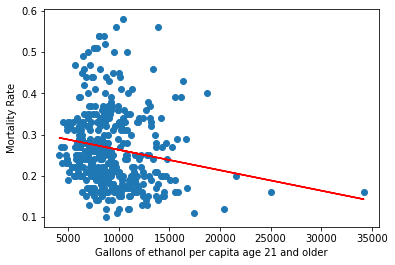

In [41]:
# Scatter of maternal and spirits with regression

plt.scatter(x_values1,y_values1)
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq1,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

Text(0, 0.5, 'Mortality Rate')

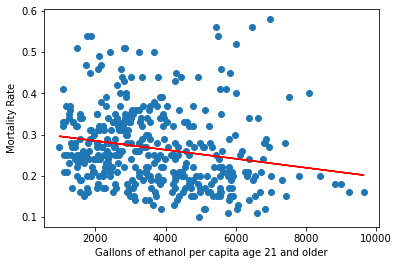

In [42]:
# Scatter of maternal and wine with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq2 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq1,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

Text(0, 0.5, 'Mortality Rate')

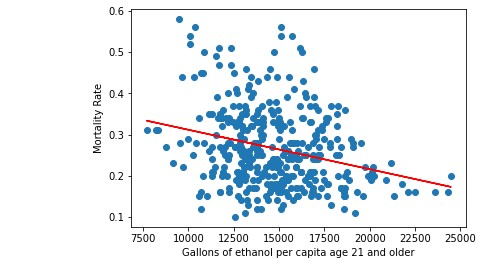

In [43]:
# Scatter of maternal and beer with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values3, y_values3)
regress_values3 = x_values3 * slope + intercept
line_eq3 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values3,y_values3)
plt.plot(x_values3,regress_values3,"r-")
plt.annotate(line_eq1,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

Text(0, 0.5, 'Mortality Rate')

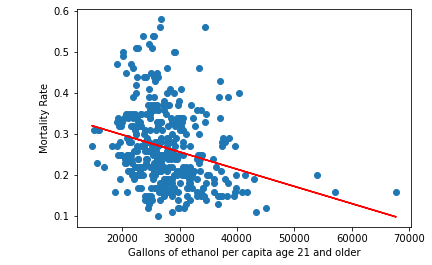

In [44]:
# Scatter of maternal and all spirits with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope + intercept
line_eq4 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values4,"r-")
plt.annotate(line_eq1,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

In [45]:
# Rename Mortality Rate column in neonatal

nih_1980_merged_neonatal.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_neonatal.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_neonatal.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_neonatal.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_neonatal.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_neonatal.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_neonatal.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_neonatal.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [51]:
# Concatenate all year dataframes for neonatal

frames_neonatal = [nih_1980_merged_neonatal, 
                    nih_1985_merged_neonatal,
                    nih_1990_merged_neonatal,
                    nih_1995_merged_neonatal,
                    nih_2000_merged_neonatal,
                    nih_2005_merged_neonatal,
                    nih_2010_merged_neonatal,
                    nih_2014_merged_neonatal]

df_concat_neonatal = pd.concat(frames_neonatal)

df_concat_neonatal.head(10)

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location
0,1980,1,1,8959,"11.03 (10.57, 12.00)",Alabama
1,1980,1,2,1960,"11.03 (10.57, 12.00)",Alabama
2,1980,1,3,11504,"11.03 (10.57, 12.00)",Alabama
3,1980,1,4,22423,"11.03 (10.57, 12.00)",Alabama
4,1980,2,1,20345,"8.19 (7.63, 8.98)",Alaska
5,1980,2,2,6036,"8.19 (7.63, 8.98)",Alaska
6,1980,2,3,18593,"8.19 (7.63, 8.98)",Alaska
7,1980,2,4,44974,"8.19 (7.63, 8.98)",Alaska
8,1980,4,1,11633,"8.53 (8.14, 9.24)",Arizona
9,1980,4,2,4277,"8.53 (8.14, 9.24)",Arizona


In [52]:
df_concat_neonatal = pd.merge(df_concat_neonatal,df_beverage_codes, how='left', left_on ='Type of beverage', right_on = 'Beverage ID')
df_concat_neonatal_clean = df_concat_neonatal['Mortality Rate'].str.split(' ').str.get(0).astype(float)
df_concat_neonatal['Mortality Rate'] = df_concat_neonatal_clean
df_concat_neonatal.head(10)

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
0,1980,1,1,8959,11.03,Alabama,1,Spirits
1,1980,1,2,1960,11.03,Alabama,2,Wine
2,1980,1,3,11504,11.03,Alabama,3,Beer
3,1980,1,4,22423,11.03,Alabama,4,All Beverages
4,1980,2,1,20345,8.19,Alaska,1,Spirits
5,1980,2,2,6036,8.19,Alaska,2,Wine
6,1980,2,3,18593,8.19,Alaska,3,Beer
7,1980,2,4,44974,8.19,Alaska,4,All Beverages
8,1980,4,1,11633,8.53,Arizona,1,Spirits
9,1980,4,2,4277,8.53,Arizona,2,Wine


In [53]:
# Isolate rows for all beverages

df_concat_neonatal1 = df_concat_neonatal.loc[df_concat_neonatal['Beverage ID'] == 1]
df_concat_neonatal2 = df_concat_neonatal.loc[df_concat_neonatal['Beverage ID'] == 2]
df_concat_neonatal3 = df_concat_neonatal.loc[df_concat_neonatal['Beverage ID'] == 3]
df_concat_neonatal4 = df_concat_neonatal.loc[df_concat_neonatal['Beverage ID'] == 4]
df_concat_neonatal4.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,408.00000,408.000000,408.0,408.000000,392.000000,408.0
mean,1997.37500,28.960784,4.0,28492.458333,5.206429,4.0
std,11.28257,15.696083,0.0,7293.558657,2.035415,0.0
min,1980.00000,1.000000,4.0,14730.000000,2.080000,4.0
25%,1988.75000,16.000000,4.0,23933.750000,3.647500,4.0
50%,1997.50000,29.000000,4.0,26947.000000,4.820000,4.0
75%,2006.25000,42.000000,4.0,31153.250000,6.175000,4.0
max,2014.00000,56.000000,4.0,67723.000000,12.250000,4.0


In [54]:
# Remove nulls

df_concat_neonatal1.dropna(inplace=True)
df_concat_neonatal2.dropna(inplace=True)
df_concat_neonatal3.dropna(inplace=True)
df_concat_neonatal4.dropna(inplace=True)

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [55]:
# setting axis for scatter plots

x_values_neo1 = df_concat_neonatal1['Gallons of ethanol per capita age 21 and older']
y_values_neo1 = df_concat_neonatal1['Mortality Rate']

x_values_neo2 = df_concat_neonatal2['Gallons of ethanol per capita age 21 and older']
y_values_neo2 = df_concat_neonatal2['Mortality Rate']

x_values_neo3 = df_concat_neonatal3['Gallons of ethanol per capita age 21 and older']
y_values_neo3 = df_concat_neonatal3['Mortality Rate']

x_values_neo4 = df_concat_neonatal4['Gallons of ethanol per capita age 21 and older']
y_values_neo4 = df_concat_neonatal4['Mortality Rate']

In [81]:
# Calculate correlation

corr_neo1= st.pearsonr(x_values_neo1,y_values_neo1)
corr_neo2= st.pearsonr(x_values_neo2,y_values_neo2)
corr_neo3= st.pearsonr(x_values_neo3,y_values_neo3)
corr_neo4= st.pearsonr(x_values_neo4,y_values_neo4)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_neo1, y_values_neo1)
regress_values_neo1 = x_values_neo1 * slope + intercept
line_eq_neo1 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

print(f"The correlation between ethanol consumption and mortality rate for spirits is {corr_neo1}")
print(f"The correlation between ethanol consumption and mortality rate for wine is {corr_neo2}")
print(f"The correlation between ethanol consumption and mortality rate for beer is {corr_neo3}")
print(f"The correlation between ethanol consumption and mortality rate for all beverages is {corr_neo4}")

The correlation between ethanol consumption and mortality rate for spirits is (0.27783151069805473, 2.222530437763218e-08)
The correlation between ethanol consumption and mortality rate for wine is (-0.18372566693548487, 0.0002550410357441535)
The correlation between ethanol consumption and mortality rate for beer is (0.2405867926722114, 1.4418601950722577e-06)
The correlation between ethanol consumption and mortality rate for all beverages is (0.20124932611359142, 5.996698500940298e-05)


Text(0, 0.5, 'Mortality Rate')

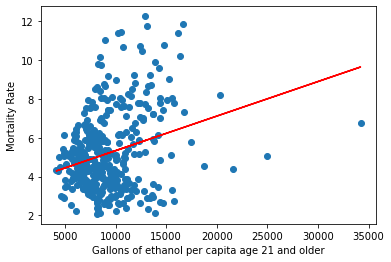

In [60]:
# Scatter of neonatal and spirits with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_neo1, y_values_neo1)
regress_values_neo1 = x_values_neo1 * slope + intercept
line_eq_neo1 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_neo1,y_values_neo1)
plt.plot(x_values_neo1,regress_values_neo1,"r-")
plt.annotate(line_eq_neo1,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

Text(0, 0.5, 'Mortality Rate')

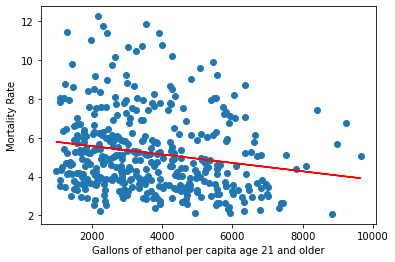

In [61]:
# Scatter of neonatal and wine with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_neo2, y_values_neo2)
regress_values_neo2 = x_values_neo2 * slope + intercept
line_eq_neo2 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_neo2,y_values_neo2)
plt.plot(x_values_neo2,regress_values_neo2,"r-")
plt.annotate(line_eq_neo2,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

Text(0, 0.5, 'Mortality Rate')

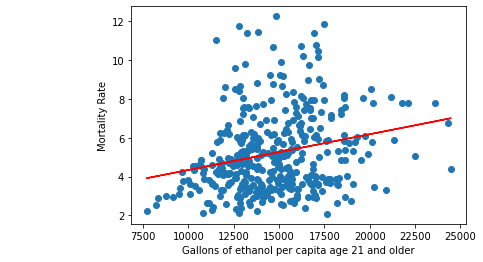

In [62]:
# Scatter of neonatal and beer with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_neo3, y_values_neo3)
regress_values_neo3 = x_values_neo3 * slope + intercept
line_eq_neo3 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_neo3,y_values_neo3)
plt.plot(x_values_neo3,regress_values_neo3,"r-")
plt.annotate(line_eq_neo3,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

Text(0, 0.5, 'Mortality Rate')

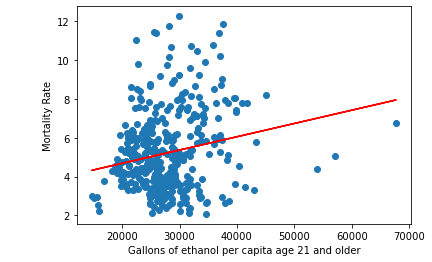

In [63]:
# Scatter of neonatal and all spirits with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_neo4, y_values_neo4)
regress_values_neo4 = x_values_neo4 * slope + intercept
line_eq_neo4 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_neo4,y_values_neo4)
plt.plot(x_values_neo4,regress_values_neo4,"r-")
plt.annotate(line_eq_neo4,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

In [64]:
# Rename Mortality Rate column in nutrition

nih_1980_merged_nutrition.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_nutrition.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_nutrition.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_nutrition.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_nutrition.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_nutrition.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_nutrition.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_nutrition.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [65]:
# Concatenate all year dataframes for nutrition

frames_nutrition = [nih_1980_merged_nutrition, 
                    nih_1985_merged_nutrition,
                    nih_1990_merged_nutrition,
                    nih_1995_merged_nutrition,
                    nih_2000_merged_nutrition,
                    nih_2005_merged_nutrition,
                    nih_2010_merged_nutrition,
                    nih_2014_merged_nutrition]

df_concat_nutrition = pd.concat(frames_nutrition)

df_concat_nutrition.head(10)

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location
0,1980,1,1,8959,"2.06 (1.86, 2.27)",Alabama
1,1980,1,2,1960,"2.06 (1.86, 2.27)",Alabama
2,1980,1,3,11504,"2.06 (1.86, 2.27)",Alabama
3,1980,1,4,22423,"2.06 (1.86, 2.27)",Alabama
4,1980,2,1,20345,"2.43 (1.50, 3.56)",Alaska
5,1980,2,2,6036,"2.43 (1.50, 3.56)",Alaska
6,1980,2,3,18593,"2.43 (1.50, 3.56)",Alaska
7,1980,2,4,44974,"2.43 (1.50, 3.56)",Alaska
8,1980,4,1,11633,"2.02 (1.79, 2.28)",Arizona
9,1980,4,2,4277,"2.02 (1.79, 2.28)",Arizona


In [66]:
df_concat_nutrition = pd.merge(df_concat_nutrition,df_beverage_codes, how='left', left_on ='Type of beverage', right_on = 'Beverage ID')
df_concat_nutrition_clean = df_concat_nutrition['Mortality Rate'].str.split(' ').str.get(0).astype(float)
df_concat_nutrition['Mortality Rate'] = df_concat_nutrition_clean
df_concat_nutrition.head(10)

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
0,1980,1,1,8959,2.06,Alabama,1,Spirits
1,1980,1,2,1960,2.06,Alabama,2,Wine
2,1980,1,3,11504,2.06,Alabama,3,Beer
3,1980,1,4,22423,2.06,Alabama,4,All Beverages
4,1980,2,1,20345,2.43,Alaska,1,Spirits
5,1980,2,2,6036,2.43,Alaska,2,Wine
6,1980,2,3,18593,2.43,Alaska,3,Beer
7,1980,2,4,44974,2.43,Alaska,4,All Beverages
8,1980,4,1,11633,2.02,Arizona,1,Spirits
9,1980,4,2,4277,2.02,Arizona,2,Wine


In [67]:
# Isolate rows for all beverages

df_concat_nutrition1 = df_concat_nutrition.loc[df_concat_nutrition['Beverage ID'] == 1]
df_concat_nutrition2 = df_concat_nutrition.loc[df_concat_nutrition['Beverage ID'] == 2]
df_concat_nutrition3 = df_concat_nutrition.loc[df_concat_nutrition['Beverage ID'] == 3]
df_concat_nutrition4 = df_concat_nutrition.loc[df_concat_nutrition['Beverage ID'] == 4]
df_concat_nutrition4.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,408.00000,408.000000,408.0,408.000000,392.000000,408.0
mean,1997.37500,28.960784,4.0,28492.458333,1.764745,4.0
std,11.28257,15.696083,0.0,7293.558657,0.508437,0.0
min,1980.00000,1.000000,4.0,14730.000000,0.580000,4.0
25%,1988.75000,16.000000,4.0,23933.750000,1.450000,4.0
50%,1997.50000,29.000000,4.0,26947.000000,1.820000,4.0
75%,2006.25000,42.000000,4.0,31153.250000,2.130000,4.0
max,2014.00000,56.000000,4.0,67723.000000,3.060000,4.0


In [74]:
# Remove nulls

df_concat_nutrition1.dropna(inplace=True)
df_concat_nutrition2.dropna(inplace=True)
df_concat_nutrition3.dropna(inplace=True)
df_concat_nutrition4.dropna(inplace=True)

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [75]:
# setting axis for scatter plots

x_values_nut1 = df_concat_nutrition1['Gallons of ethanol per capita age 21 and older']
y_values_nut1 = df_concat_nutrition1['Mortality Rate']

x_values_nut2 = df_concat_nutrition2['Gallons of ethanol per capita age 21 and older']
y_values_nut2 = df_concat_nutrition2['Mortality Rate']

x_values_nut3 = df_concat_nutrition3['Gallons of ethanol per capita age 21 and older']
y_values_nut3 = df_concat_nutrition3['Mortality Rate']

x_values_nut4 = df_concat_nutrition4['Gallons of ethanol per capita age 21 and older']
y_values_nut4 = df_concat_nutrition4['Mortality Rate']

In [82]:
# Calculate correlation

corr_nut1= st.pearsonr(x_values_nut1,y_values_nut1)
corr_nut2= st.pearsonr(x_values_nut2,y_values_nut2)
corr_nut3= st.pearsonr(x_values_nut3,y_values_nut3)
corr_nut4= st.pearsonr(x_values_nut4,y_values_nut4)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_nut1, y_values_nut1)
regress_values_nut1 = x_values_nut1 * slope + intercept
line_eq_nut1 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

print(f"The correlation between ethanol consumption and mortality rate for spirits is {corr_nut1}")
print(f"The correlation between ethanol consumption and mortality rate for wine is {corr_nut2}")
print(f"The correlation between ethanol consumption and mortality rate for beer is {corr_nut3}")
print(f"The correlation between ethanol consumption and mortality rate for all beverages is {corr_nut4}")

The correlation between ethanol consumption and mortality rate for spirits is (-0.07999328254738212, 0.11381784709629021)
The correlation between ethanol consumption and mortality rate for wine is (-0.4813536739955447, 3.966689744371043e-24)
The correlation between ethanol consumption and mortality rate for beer is (0.30448221732288977, 7.462355412177744e-10)
The correlation between ethanol consumption and mortality rate for all beverages is (-0.04615855619733611, 0.36205294696629187)


Text(0, 0.5, 'Mortality Rate')

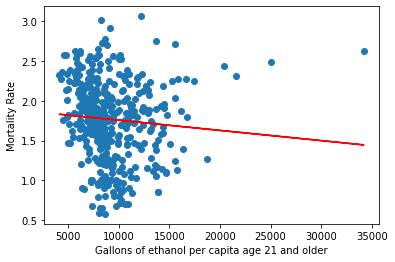

In [83]:
# Scatter of nutrition and spirits with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_nut1, y_values_nut1)
regress_values_nut1 = x_values_nut1 * slope + intercept
line_eq_nut1 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_nut1,y_values_nut1)
plt.plot(x_values_nut1,regress_values_nut1,"r-")
plt.annotate(line_eq_nut1,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

Text(0, 0.5, 'Mortality Rate')

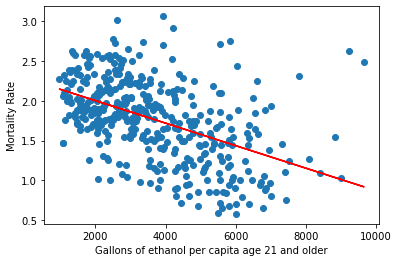

In [84]:
# Scatter of nutrition and wine with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_nut2, y_values_nut2)
regress_values_nut2 = x_values_nut2 * slope + intercept
line_eq_nut2 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_nut2,y_values_nut2)
plt.plot(x_values_nut2,regress_values_nut2,"r-")
plt.annotate(line_eq_nut2,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

Text(0, 0.5, 'Mortality Rate')

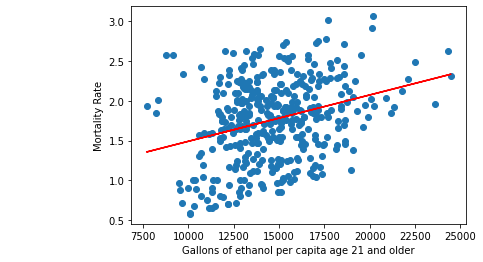

In [85]:
# Scatter of nutrition and beer with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_nut3, y_values_nut3)
regress_values_nut3 = x_values_nut3 * slope + intercept
line_eq_nut3 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_nut3,y_values_nut3)
plt.plot(x_values_nut3,regress_values_nut3,"r-")
plt.annotate(line_eq_nut3,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

Text(0, 0.5, 'Mortality Rate')

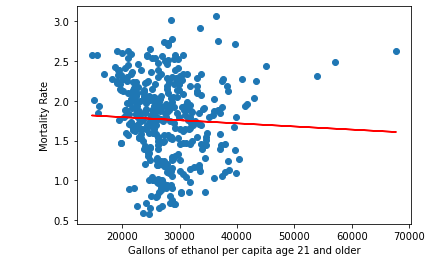

In [86]:
# Scatter of nutrition and all spirits with regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_nut4, y_values_nut4)
regress_values_nut4 = x_values_nut4 * slope + intercept
line_eq_nut4 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_nut4,y_values_nut4)
plt.plot(x_values_nut4,regress_values_nut4,"r-")
plt.annotate(line_eq_nut4,(0.5, 0.5),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')